In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("gym_crowdedness.csv")
df.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17


In [3]:
df.shape

(62184, 11)

In [4]:
df.columns

Index(['number_people', 'date', 'timestamp', 'day_of_week', 'is_weekend',
       'is_holiday', 'temperature', 'is_start_of_semester',
       'is_during_semester', 'month', 'hour'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   number_people         62184 non-null  int64  
 1   date                  62184 non-null  object 
 2   timestamp             62184 non-null  int64  
 3   day_of_week           62184 non-null  int64  
 4   is_weekend            62184 non-null  int64  
 5   is_holiday            62184 non-null  int64  
 6   temperature           62184 non-null  float64
 7   is_start_of_semester  62184 non-null  int64  
 8   is_during_semester    62184 non-null  int64  
 9   month                 62184 non-null  int64  
 10  hour                  62184 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 5.2+ MB


In [6]:
df.describe()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
count,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000
mean,29.072543,45799.437958,2.982504,0.282870,0.002573,58.557108,0.078831,0.660218,7.439824,12.236460
std,22.689026,24211.275891,1.996825,0.450398,0.050660,6.316396,0.269476,0.473639,3.445069,6.717631
min,0.000000,0.000000,0.000000,0.000000,0.000000,38.140000,0.000000,0.000000,1.000000,0.000000
25%,9.000000,26624.000000,1.000000,0.000000,0.000000,55.000000,0.000000,0.000000,5.000000,7.000000
50%,28.000000,46522.500000,3.000000,0.000000,0.000000,58.340000,0.000000,1.000000,8.000000,12.000000
75%,43.000000,66612.000000,5.000000,1.000000,0.000000,62.280000,0.000000,1.000000,10.000000,18.000000
max,145.000000,86399.000000,6.000000,1.000000,1.000000,87.170000,1.000000,1.000000,12.000000,23.000000


In [7]:
df.isnull().sum()

number_people           0
date                    0
timestamp               0
day_of_week             0
is_weekend              0
is_holiday              0
temperature             0
is_start_of_semester    0
is_during_semester      0
month                   0
hour                    0
dtype: int64

In [8]:
df['date'] = pd.to_datetime(df['date'],utc = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   number_people         62184 non-null  int64              
 1   date                  62184 non-null  datetime64[ns, UTC]
 2   timestamp             62184 non-null  int64              
 3   day_of_week           62184 non-null  int64              
 4   is_weekend            62184 non-null  int64              
 5   is_holiday            62184 non-null  int64              
 6   temperature           62184 non-null  float64            
 7   is_start_of_semester  62184 non-null  int64              
 8   is_during_semester    62184 non-null  int64              
 9   month                 62184 non-null  int64              
 10  hour                  62184 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(1), int64(9)
memory usage: 5.2 M

In [9]:
df['date']

0       2015-08-15 00:00:11+00:00
1       2015-08-15 00:20:14+00:00
2       2015-08-15 00:30:15+00:00
3       2015-08-15 00:40:16+00:00
4       2015-08-15 00:50:17+00:00
                   ...           
62179   2017-03-19 01:42:28+00:00
62180   2017-03-19 01:52:35+00:00
62181   2017-03-19 02:02:40+00:00
62182   2017-03-19 02:12:47+00:00
62183   2017-03-19 02:22:51+00:00
Name: date, Length: 62184, dtype: datetime64[ns, UTC]

In [10]:
df['year'] = df['date'].dt.year
#df['month'] = df['date'].dt.month
#df['day'] = df['date'].dt.day
#df['hour'] = df['date'].dt.hour

In [11]:
df.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour,year
0,37,2015-08-15 00:00:11+00:00,61211,4,0,0,71.76,0,0,8,17,2015
1,45,2015-08-15 00:20:14+00:00,62414,4,0,0,71.76,0,0,8,17,2015
2,40,2015-08-15 00:30:15+00:00,63015,4,0,0,71.76,0,0,8,17,2015
3,44,2015-08-15 00:40:16+00:00,63616,4,0,0,71.76,0,0,8,17,2015
4,45,2015-08-15 00:50:17+00:00,64217,4,0,0,71.76,0,0,8,17,2015


In [12]:
df['year'].unique()

array([2015, 2016, 2017], dtype=int32)

In [13]:
df.drop('date', axis=1, inplace=True)
df.head()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour,year
0,37,61211,4,0,0,71.76,0,0,8,17,2015
1,45,62414,4,0,0,71.76,0,0,8,17,2015
2,40,63015,4,0,0,71.76,0,0,8,17,2015
3,44,63616,4,0,0,71.76,0,0,8,17,2015
4,45,64217,4,0,0,71.76,0,0,8,17,2015


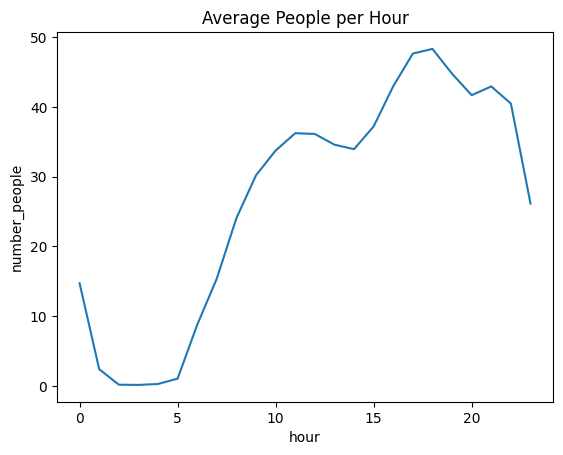

In [14]:
sns.lineplot(data=df, x="hour", y="number_people", errorbar=None)
plt.title("Average People per Hour")
plt.show()

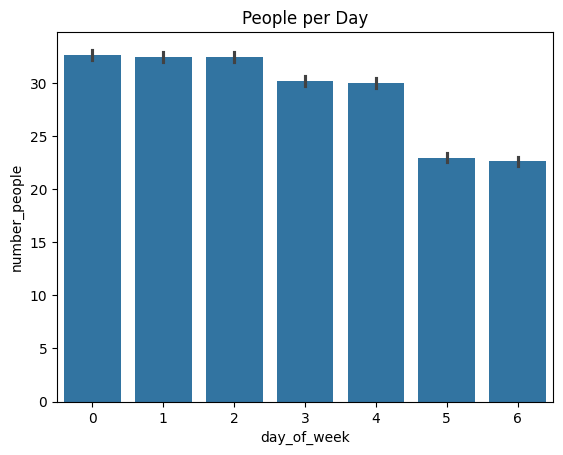

In [15]:
sns.barplot(data=df, x="day_of_week", y="number_people")
plt.title("People per Day")
plt.show()

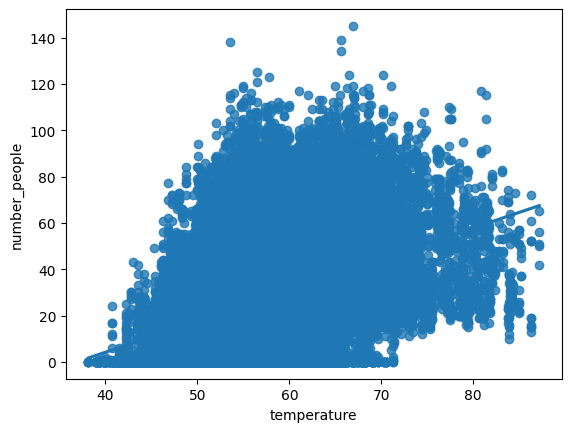

In [16]:
sns.regplot(data=df, x="temperature", y="number_people")
plt.show()

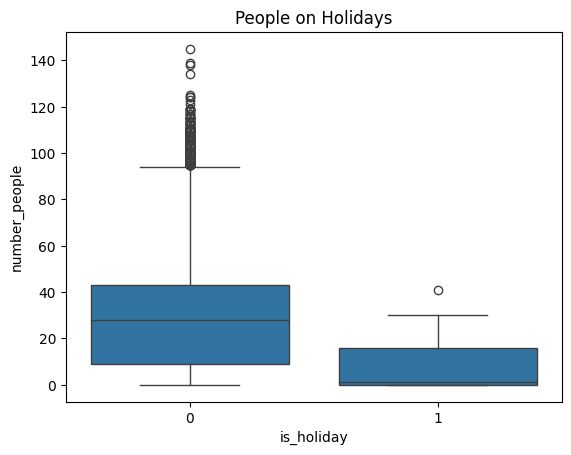

In [17]:
sns.boxplot(data=df, x="is_holiday", y="number_people")
plt.title("People on Holidays")
plt.show()

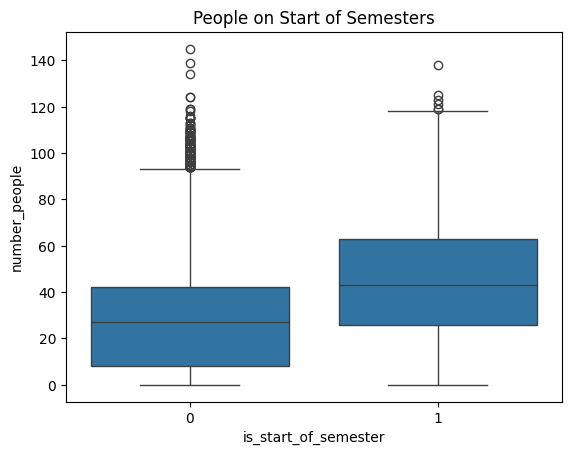

In [18]:
sns.boxplot(data=df, x="is_start_of_semester", y="number_people")
plt.title("People on Start of Semesters")
plt.show()

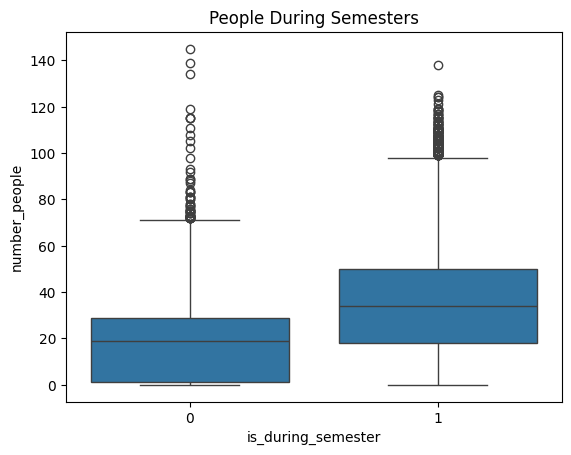

In [19]:
sns.boxplot(data=df, x="is_during_semester", y="number_people")
plt.title("People During Semesters")
plt.show()

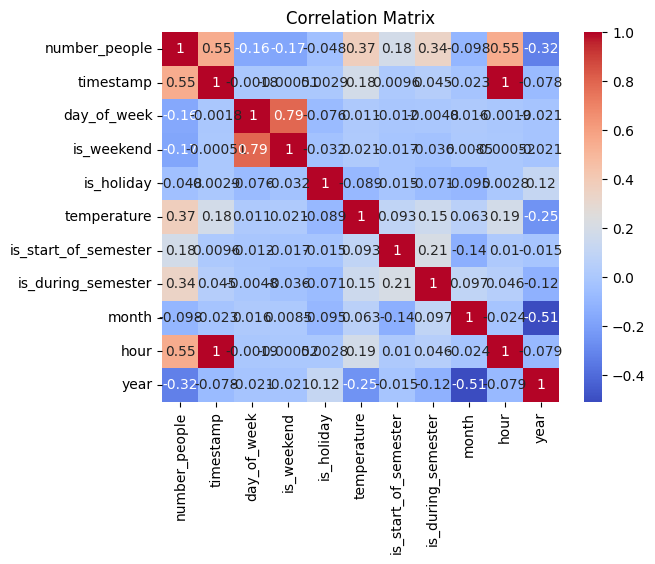

In [20]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [21]:
df.corr()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour,year
number_people,1.000000,0.550218,-0.162062,-0.173958,-0.048249,0.373327,0.182683,0.335350,-0.097854,0.552049,-0.322591
timestamp,0.550218,1.000000,-0.001793,-0.000509,0.002851,0.184849,0.009551,0.044676,-0.023221,0.999077,-0.077767
day_of_week,-0.162062,-0.001793,1.000000,0.791338,-0.075862,0.011169,-0.011782,-0.004824,0.015559,-0.001914,-0.021242
is_weekend,-0.173958,-0.000509,0.791338,1.000000,-0.031899,0.020673,-0.016646,-0.036127,0.008462,-0.000517,-0.021260
is_holiday,-0.048249,0.002851,-0.075862,-0.031899,1.000000,-0.088527,-0.014858,-0.070798,-0.094942,0.002843,0.121129
temperature,0.373327,0.184849,0.011169,0.020673,-0.088527,1.000000,0.093242,0.152476,0.063125,0.185121,-0.249638
is_start_of_semester,0.182683,0.009551,-0.011782,-0.016646,-0.014858,0.093242,1.000000,0.209862,-0.137160,0.010091,-0.015377
is_during_semester,0.335350,0.044676,-0.004824,-0.036127,-0.070798,0.152476,0.209862,1.000000,0.096556,0.045581,-0.124302
month,-0.097854,-0.023221,0.015559,0.008462,-0.094942,0.063125,-0.137160,0.096556,1.000000,-0.023624,-0.508552
hour,0.552049,0.999077,-0.001914,-0.000517,0.002843,0.185121,0.010091,0.045581,-0.023624,1.000000,-0.078816


In [22]:
df.drop('timestamp', axis = 1, inplace=True)
df.head()

,number_people,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour,year
0,37,4,0,0,71.76,0,0,8,17,2015
1,45,4,0,0,71.76,0,0,8,17,2015
2,40,4,0,0,71.76,0,0,8,17,2015
3,44,4,0,0,71.76,0,0,8,17,2015
4,45,4,0,0,71.76,0,0,8,17,2015


In [23]:
#dependent & independent feature 
X = df.drop('number_people', axis= 1)
y = df['number_people']

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=15)

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [28]:
def calculate_model_metrics(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [29]:
models = {
    "Linear Regression" : LinearRegression(),
    "Lasso": Lasso(),
    "Ridge" : Ridge(),
    "K-Neighbors Regressor"  : KNeighborsRegressor(),
    "Decision Tree" : DecisionTreeRegressor(),
    "Random Forest Regressor" : RandomForestRegressor()
}

In [30]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_rmse, model_train_r2 = calculate_model_metrics(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = calculate_model_metrics(y_test, y_test_pred)

    print(list(models.values())[i])

    print("Evaluation for Training Set")
    print("RMSE :", model_train_rmse)
    print("Mean Absolute Error :", model_train_mae)
    print("R2 Score :", model_train_r2)

    print("-----------------------------")
    
    print("Evaluation for Test Set")
    print("RMSE :", model_test_rmse)
    print("Mean Absolute Error :", model_test_mae)
    print("R2 Score :", model_test_r2)

    print("-----------------------------")
    print("\n")

LinearRegression()
Evaluation for Training Set
RMSE : 14.322500408269727
Mean Absolute Error : 10.733469936454323
R2 Score : 0.5999639521710997
-----------------------------
Evaluation for Test Set
RMSE : 14.45063290337055
Mean Absolute Error : 10.77975237102956
R2 Score : 0.5989271376662774
-----------------------------


Lasso()
Evaluation for Training Set
RMSE : 14.569122351126818
Mean Absolute Error : 10.945189874221992
R2 Score : 0.5860687429058036
-----------------------------
Evaluation for Test Set
RMSE : 14.703511215751082
Mean Absolute Error : 10.970594902476911
R2 Score : 0.5847671974050241
-----------------------------


Ridge()
Evaluation for Training Set
RMSE : 14.322500413912243
Mean Absolute Error : 10.733479178820698
R2 Score : 0.5999639518559019
-----------------------------
Evaluation for Test Set
RMSE : 14.450633329986024
Mean Absolute Error : 10.77975955902301
R2 Score : 0.5989271139851151
-----------------------------


KNeighborsRegressor()
Evaluation for Trainin

In [31]:
#hyperparameter tuning

knn_params = {"n_neighbors" : [2,3,10,20,40,50]}
rf_params = {
        "max_depth" : [5,8,10,15,None],
        "max_features" : ["sqrt", "log2", 5, 7, 10],
        "min_samples_split" : [2, 8, 12, 20],
        "n_estimators" : [100, 200, 500, 1000]
}

In [32]:
from sklearn.model_selection import RandomizedSearchCV

In [33]:
randomcv_models = [
    ("KNN", KNeighborsRegressor(), knn_params),
    ("RF", RandomForestRegressor(), rf_params)
        ]

In [36]:
from tqdm import tqdm
from tqdm_joblib import tqdm_joblib
for name, model, params in randomcv_models:
    print(f"--- {name} Modeli İçin Optimizasyon Başlatılıyor ---")
    
    # Modeli ve parametreleri tanımla
    randomcv = RandomizedSearchCV(estimator=model, 
                                param_distributions=params, 
                                n_iter=100,  # Denenecek kombinasyon sayısı
                                cv=3,        # Çapraz doğrulama kat sayısı
                                n_jobs=-1, 
                                verbose=0) # verbose=0 yapıyoruz ki scikit-learn'ün kendi çıktısıyla karışmasın
    
    # Toplam fit sayısını hesapla: n_iter * cv
    n_fits = randomcv.n_iter * randomcv.cv
    
    # tqdm_joblib ile fit işlemini çalıştır ve ilerlemeyi göster
    with tqdm_joblib(tqdm(desc=f"{name} Optimizasyonu", total=n_fits)) as progress_bar:
        randomcv.fit(X_train, y_train)
        
    print(f"\nEn iyi parametreler bulundu: {name}")
    print(randomcv.best_params_)
    print("-" * (len(name) + 40) + "\n")

d:\Project\DataScienceMachineLearning\MachineLearning\venv\Lib\site-packages\tqdm_joblib\__init__.py:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


--- KNN Modeli İçin Optimizasyon Başlatılıyor ---


KNN Optimizasyonu:   0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

d:\Project\DataScienceMachineLearning\MachineLearning\venv\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=100. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



En iyi parametreler bulundu: KNN
{'n_neighbors': 2}
-------------------------------------------

--- RF Modeli İçin Optimizasyon Başlatılıyor ---


  0%|          | 0/300 [00:00<?, ?it/s]

KNN Optimizasyonu:   0%|          | 0/300 [00:17<?, ?it/s]



En iyi parametreler bulundu: RF
{'n_estimators': 500, 'min_samples_split': 2, 'max_features': 7, 'max_depth': None}
------------------------------------------



In [37]:
# best params for : KNN {'n_neighbors': 2}
# best params for : RF {'n_estimators': 500, 'min_samples_split': 2, 'max_features': 7, 'max_depth': None}

models = {
    "K-Neighbors Regressor"  : KNeighborsRegressor(n_neighbors=2),
    "Random Forest Regressor" : RandomForestRegressor(n_estimators=500,
                                                     min_samples_split=2,
                                                      max_features=7,
                                                      max_depth = None)
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_rmse, model_train_r2 = calculate_model_metrics(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = calculate_model_metrics(y_test, y_test_pred)

    print(list(models.values())[i])

    print("Evaluation for Training Set")
    print("RMSE :", model_train_rmse)
    print("Mean Absolute Error :", model_train_mae)
    print("R2 Score :", model_train_r2)

    print("-----------------------------")
    
    print("Evaluation for Test Set")
    print("RMSE :", model_test_rmse)
    print("Mean Absolute Error :", model_test_mae)
    print("R2 Score :", model_test_r2)

    print("-----------------------------")
    print("\n")

KNeighborsRegressor(n_neighbors=2)
Evaluation for Training Set
RMSE : 5.459915271471292
Mean Absolute Error : 3.554365538830996
R2 Score : 0.9418655928537132
-----------------------------
Evaluation for Test Set
RMSE : 6.901495818935785
Mean Absolute Error : 4.6316737424417855
R2 Score : 0.9085179266857696
-----------------------------


RandomForestRegressor(max_features=7, n_estimators=500)
Evaluation for Training Set
RMSE : 4.710738657744436
Mean Absolute Error : 3.197561638662891
R2 Score : 0.9567247621381872
-----------------------------
Evaluation for Test Set
RMSE : 6.423636703624908
Mean Absolute Error : 4.293388358970401
R2 Score : 0.920747771659685
-----------------------------


